# Visualisations: Adding the necessary Finishing touches

### Importing Required Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

color = ['#1C3578', '#ee1c25']
china_hexa = '#ee1c25'
rusia_hexa = '#1C3578'

In [7]:
df = pd.read_feather('Data/wikiarticles_seg_data.feather')
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)) # Combine month and year into a datetime column


nlp_df = pd.read_feather('Data\wikiarticles_opinion_mining_results.feather')
nlp_df['date'] = pd.to_datetime(nlp_df[['year', 'month']].assign(day=1))    

In [8]:
df.sample(3)

,title,text,file_id,month,year,article_name,category,date
265809,Leader of China,in August .]] Dmitry Medvedev on September .]...,689726992,11,2015,Xi Jinping,Leadership Tenures,2015-11-01
24273,Further reading,,1084062359,04,2022,Vladimir Putin,References,2022-04-01
65852,Speeches and catch phrases,on February .]] The election campaign of the...,485484694,04,2012,Vladimir Putin,Communications,2012-04-01


In [9]:
nlp_df.sample(3)

,title,text,file_id,month,year,article_name,category,date,bias_score,bias_class,...,fear_emotion,joy_emotion,negative_emotion,positive_emotion,sadness_emotion,surprise_emotion,trust_emotion,left_lean,center_lean,right_lean
201,First Premiership (1999),"In May , Putin was appointed Mayor Sobchak's a...",547791410,03,2013,Vladimir Putin,Leadership Tenures,2013-03-01,-0.087325,Biased,...,0.003690,0.018450,0.011070,0.062731,0.003690,0.014760,0.040590,0.547389,0.223570,0.229042
302300,Leadership,in August .]] Dmitry Medvedev on September .]...,828100416,02,2018,Xi Jinping,Leadership Tenures,2018-02-01,-0.845056,Biased,...,0.005952,0.005952,0.026190,0.035714,0.003571,0.008333,0.016667,0.264461,0.384273,0.351267
25568,Public image,Leonid Bershidsky analyzed Putin's interview w...,1090868066,05,2022,Vladimir Putin,Public Imaage,2022-05-01,-0.878912,Biased,...,0.017339,0.009142,0.032156,0.045397,0.011349,0.007566,0.031526,0.214584,0.122399,0.663017


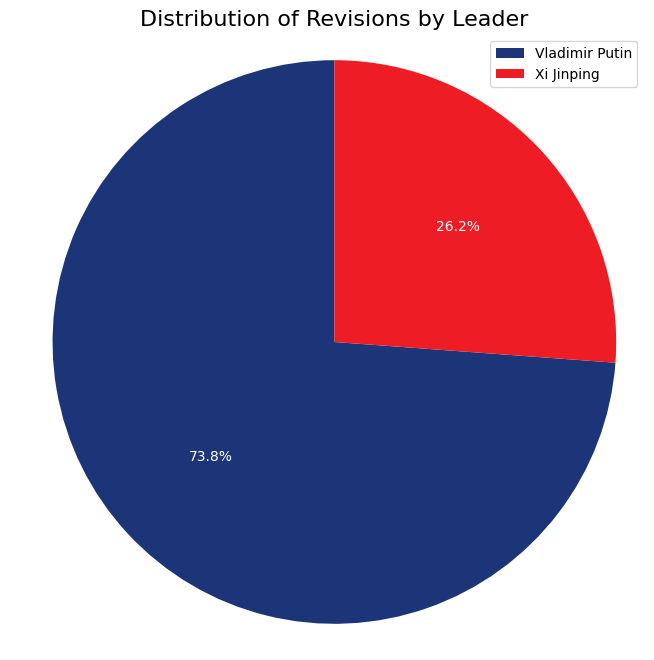

In [10]:
# Count unique file_ids for each leader
putin_count = df[df['article_name'] == 'Vladimir Putin']['file_id'].nunique()
xi_count = df[df['article_name'] == 'Xi Jinping']['file_id'].nunique()

# Prepare data for the pie chart
labels = ['Vladimir Putin', 'Xi Jinping']
sizes = [putin_count, xi_count]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, labels=labels, 
    autopct=lambda pct: f'{pct:.1f}%',  # Formatting percentage
    startangle=90, 
    colors=['#1C3578', '#ee1c25'],
    textprops={'color': 'white'},  # Set inside font color to white
)
plt.title('Distribution of Revisions by Leader', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

plt.savefig('Data\Figures\pie_revisions_distribution.svg', format='svg')

# Show the pie chart
plt.show()

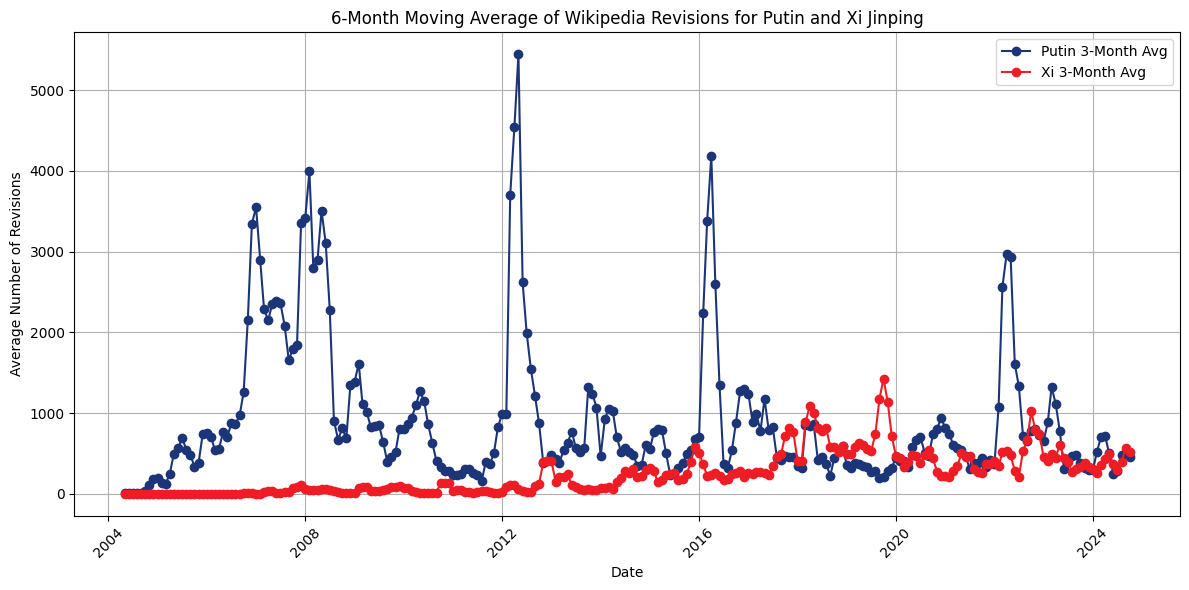

In [15]:
df_putin = df[df.article_name=='Vladimir Putin']
df_xi = df[df.article_name=='Xi Jinping']

# Counting monthly revisions for both individuals
putin_counts = df_putin.groupby(['year', 'month']).size().reset_index(name='putin_revisions')
xi_counts = df_xi.groupby(['year', 'month']).size().reset_index(name='xi_revisions')

# Merging the counts on year and month
merged_counts = pd.merge(putin_counts, xi_counts, on=['year', 'month'], how='outer').fillna(0)

# Creating a 'date' column for plotting
merged_counts['date'] = pd.to_datetime(merged_counts[['year', 'month']].assign(day=1))

# Calculating 3-month moving averages
merged_counts['putin_moving_avg'] = merged_counts['putin_revisions'].rolling(window=3).mean()
merged_counts['xi_moving_avg'] = merged_counts['xi_revisions'].rolling(window=3).mean()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(merged_counts['date'], merged_counts['putin_moving_avg'], marker='o', label='Putin 3-Month Avg', color=rusia_hexa)
plt.plot(merged_counts['date'], merged_counts['xi_moving_avg'], marker='o', label='Xi 3-Month Avg', color=china_hexa)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Number of Revisions')
plt.title('6-Month Moving Average of Wikipedia Revisions for Putin and Xi Jinping')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(r'Data\Figures\ts_revisions_3_month_avg.svg', format='svg') 

plt.show()

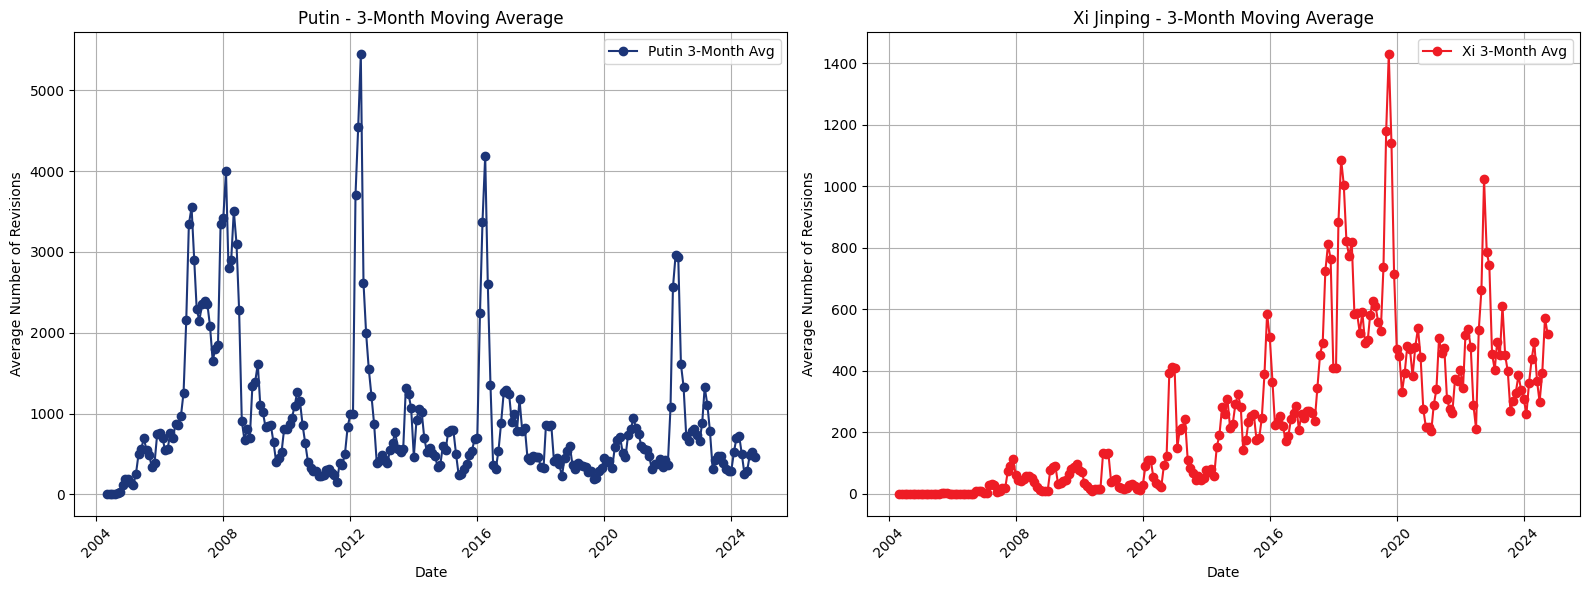

In [15]:
# Filtering data for Putin and Xi
df_putin = df[df.article_name == 'Vladimir Putin']
df_xi = df[df.article_name == 'Xi Jinping']

# Counting monthly revisions for both individuals
putin_counts = df_putin.groupby(['year', 'month']).size().reset_index(name='putin_revisions')
xi_counts = df_xi.groupby(['year', 'month']).size().reset_index(name='xi_revisions')

# Merging the counts on year and month
merged_counts = pd.merge(putin_counts, xi_counts, on=['year', 'month'], how='outer').fillna(0)

# Creating a 'date' column for plotting
merged_counts['date'] = pd.to_datetime(merged_counts[['year', 'month']].assign(day=1))

# Calculating 3-month moving averages
merged_counts['putin_moving_avg'] = merged_counts['putin_revisions'].rolling(window=3).mean()
merged_counts['xi_moving_avg'] = merged_counts['xi_revisions'].rolling(window=3).mean()

# Plotting the results in subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Putin's data on the left subplot
ax1.plot(merged_counts['date'], merged_counts['putin_moving_avg'], marker='o', label='Putin 3-Month Avg', color=rusia_hexa)
ax1.set_title('Putin - 3-Month Moving Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Number of Revisions')
ax1.legend()
ax1.grid()
ax1.tick_params(axis='x', rotation=45)


# Plotting Xi's data on the right subplot
ax2.plot(merged_counts['date'], merged_counts['xi_moving_avg'], marker='o', label='Xi 3-Month Avg', color=china_hexa)
ax2.set_title('Xi Jinping - 3-Month Moving Average')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Number of Revisions')
ax2.legend()
ax2.grid()
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig(r'Data\Figures\ts_revisions_3_month_avg_split.svg', format='svg')

plt.show()

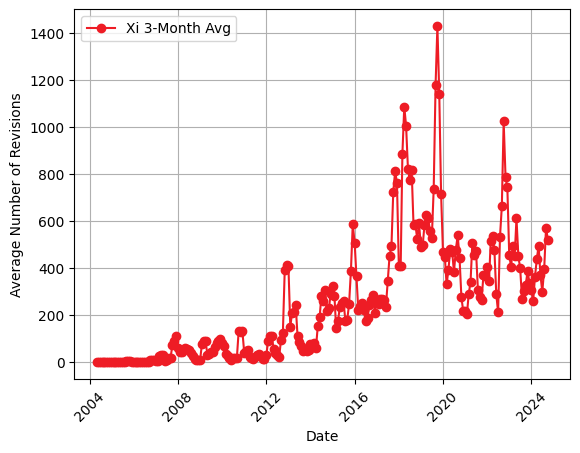

In [34]:

plt.plot(merged_counts['date'], merged_counts['xi_moving_avg'], marker='o', label='Xi 3-Month Avg', color=china_hexa)
plt.xlabel('Date')
plt.ylabel('Average Number of Revisions')
plt.legend()
plt.grid()
plt.tick_params(axis='x', rotation=45)
plt.show()

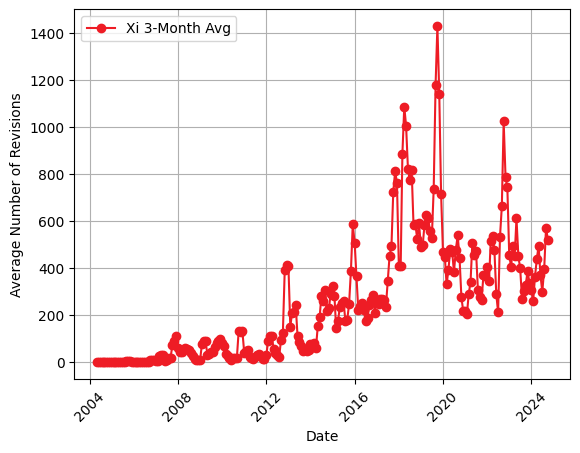

## Analysis of Wikipedia Revision Categories as % for Vladimir Putin and Xi Jinping
The data is grouped by category to compute the percentage of total revisions for each leader. Finally, a bar plot displays the percentage distribution, sorted by total revision percentage across both leaders.

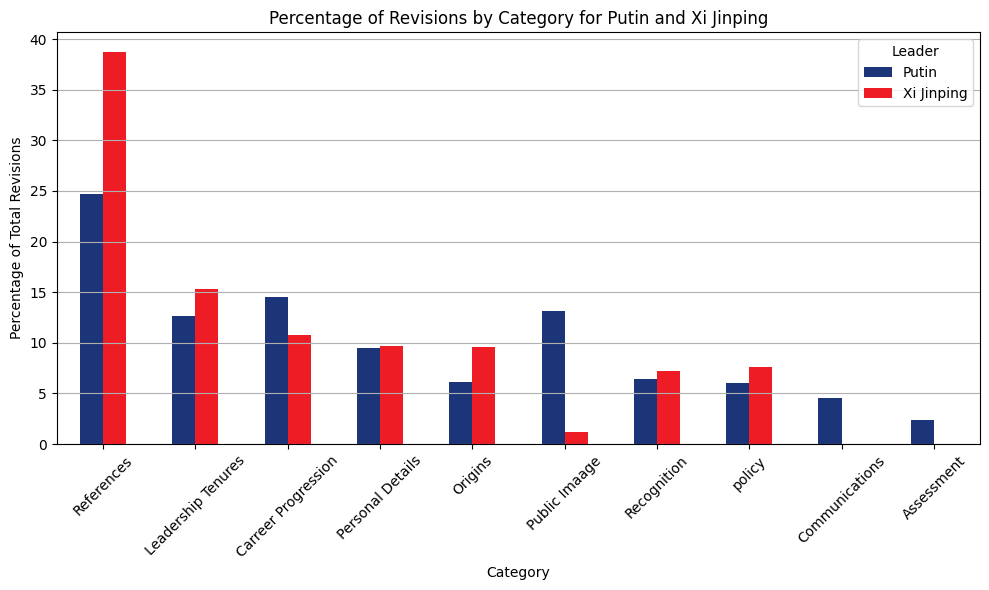

In [18]:
category_counts = df.groupby(['article_name', 'category']).size().reset_index(name='count')

# Calculate total counts for each leader
total_counts = category_counts.groupby('article_name')['count'].sum().reset_index()
total_counts.columns = ['article_name', 'total_count']

# Merge total counts back to category counts
merged_counts = pd.merge(category_counts, total_counts, on='article_name')
merged_counts['percentage'] = (merged_counts['count'] / merged_counts['total_count']) * 100

# Step 2: Pivot data and sort by total percentage
# Pivot the data for plotting
plot_data = merged_counts.pivot(index='category', columns='article_name', values='percentage').fillna(0)

# Calculate total percentage across both leaders for sorting
plot_data['total_percentage'] = plot_data.sum(axis=1)
plot_data = plot_data.sort_values(by='total_percentage', ascending=False)
plot_data = plot_data.drop(columns='total_percentage')  # Drop total after sorting

# Plotting with custom colors
plot_data.plot(kind='bar', figsize=(10, 6), color=['#1C3578', '#ee1c25'])
plt.title('Percentage of Revisions by Category for Putin and Xi Jinping')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Revisions')
plt.xticks(rotation=45)
plt.legend(['Putin', 'Xi Jinping'], title='Leader')
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(r'Data\Figures\bar_percejtage_revisions_by_category.svg', format='svg')

plt.show()

**Inference**

- There appears to be an overcorrection in the number of references and public image details for both Xi Jinping and Putin, potentially due to:
  - The substantial volume of minutes and documents released from CCP meetings.
  - China’s active involvement in regions such as Africa and the Global South.
  - A possible increase in fact-checking effort after the Russia Ukraine war.

- The categories of leadership tenure, career progression, and personal life remain stable for both leaders. This likely reflects:
  - The enduring nature of their respective regimes.
  - Their relatively private, uneventful, and discreet personal lives.

# Bias Analysis

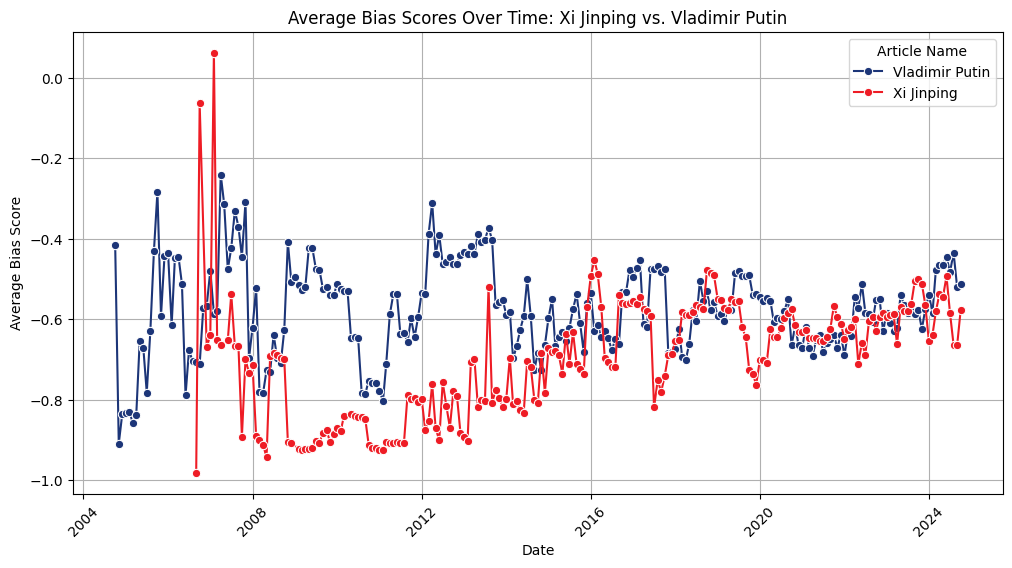

In [24]:
# Convert 'date' to datetime if it isn't already
nlp_df['date'] = pd.to_datetime(nlp_df['date'])

# Ensure the bias_score is numeric
nlp_df['bias_score'] = pd.to_numeric(nlp_df['bias_score'], errors='coerce')

# Calculate average bias scores for each date and article name
time_series_bias = nlp_df.groupby(['date', 'article_name'])['bias_score'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(12, 6))

# Define custom colors for the articles
custom_palette = {
    'Xi Jinping': china_hexa,  # Example hex color for China
    'Vladimir Putin': rusia_hexa  # Example hex color for Russia
}

# Plot the average bias scores over time with custom colors
sns.lineplot(data=time_series_bias, x='date', y='bias_score', hue='article_name', 
             marker='o', palette=custom_palette)

# Customize the plot
plt.title('Average Bias Scores Over Time: Xi Jinping vs. Vladimir Putin')
plt.xlabel('Date')
plt.ylabel('Average Bias Score')
plt.xticks(rotation=45)
plt.legend(title='Article Name')
plt.grid(True)

# Save the plot as an SVG file
plt.savefig(r'Data\Figures\bias_scores_over_time.svg', format='svg')

# Show the plot
plt.show()

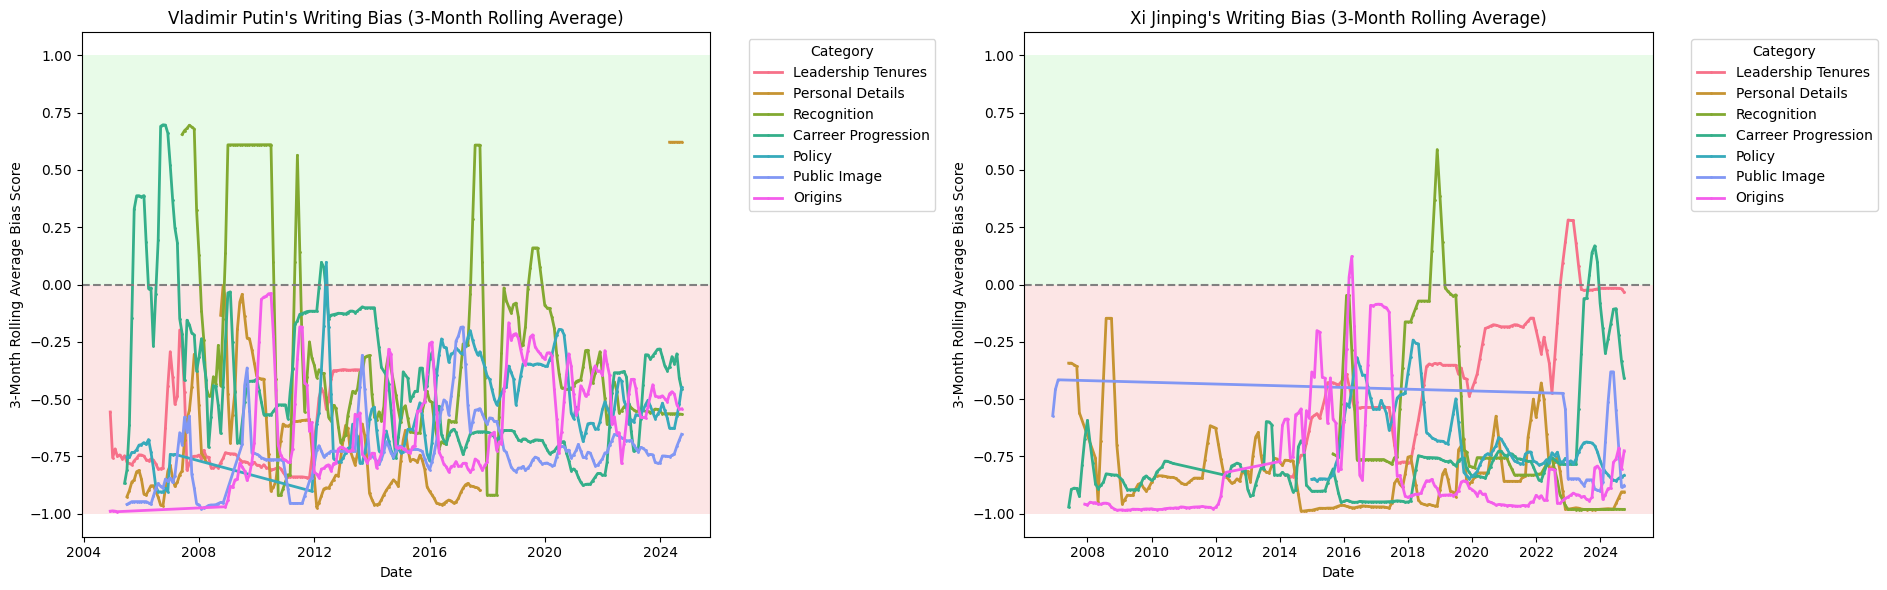

In [38]:
# Create a new DataFrame for each leader
putin_df = nlp_df[nlp_df['article_name'] == 'Vladimir Putin']
xi_df = nlp_df[nlp_df['article_name'] == 'Xi Jinping']

# Group by year and month to find average bias score
putin_grouped = putin_df.groupby(['year', 'month', 'category'])['bias_score'].mean().reset_index()
xi_grouped = xi_df.groupby(['year', 'month', 'category'])['bias_score'].mean().reset_index()

category_rename = {
    'policy': 'Policy',
    'Public Imaage': 'Public Image'
}

# Apply the renaming to both grouped DataFrames
putin_grouped['category'] = putin_grouped['category'].replace(category_rename)
xi_grouped['category'] = xi_grouped['category'].replace(category_rename)


# Combine year and month for rolling average calculation
putin_grouped['date'] = pd.to_datetime(putin_grouped[['year', 'month']].assign(day=1))
xi_grouped['date'] = pd.to_datetime(xi_grouped[['year', 'month']].assign(day=1))

# Set date as index for rolling calculation
putin_grouped.set_index('date', inplace=True)
xi_grouped.set_index('date', inplace=True)

# Calculate rolling average (3-month)
putin_grouped['rolling_avg'] = putin_grouped.groupby('category')['bias_score'].transform(lambda x: x.rolling(window=3).mean())
xi_grouped['rolling_avg'] = xi_grouped.groupby('category')['bias_score'].transform(lambda x: x.rolling(window=3).mean())

# Reset index for plotting
putin_grouped.reset_index(inplace=True)
xi_grouped.reset_index(inplace=True)

# Find common categories
common_categories = set(putin_grouped['category']).intersection(set(xi_grouped['category']))

# Filter both DataFrames to keep only common categories
putin_grouped = putin_grouped[putin_grouped['category'].isin(common_categories)]
xi_grouped = xi_grouped[xi_grouped['category'].isin(common_categories)]

# Set color palette for consistent colors across both plots
palette = sns.color_palette("husl", len(common_categories))

# Plotting
plt.figure(figsize=(19, 6))

# Line Plot for Vladimir Putin
plt.subplot(1, 2, 1)

# Fill the background color
plt.axhspan(-1, 0, facecolor='lightcoral', alpha=0.2)  # Light red for negative bias
plt.axhspan(0, 1, facecolor='lightgreen', alpha=0.2)  # Light green for neutral/positive bias

for category in common_categories:
    data = putin_grouped[putin_grouped['category'] == category]
    plt.plot(data['date'], data['rolling_avg'], marker='o', label=category, color=palette[list(common_categories).index(category)], markersize=1, linewidth=2)  # Adjusted marker size

plt.title("Vladimir Putin's Writing Bias (3-Month Rolling Average)")
plt.xlabel("Date")
plt.ylabel("3-Month Rolling Average Bias Score")
plt.axhline(0, color='grey', linestyle='--')  # Line at y=0 for reference
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Line Plot for Xi Jinping
plt.subplot(1, 2, 2)

# Fill the background color
plt.axhspan(-1, 0, facecolor='lightcoral', alpha=0.2)  # Light red for negative bias
plt.axhspan(0, 1, facecolor='lightgreen', alpha=0.2)  # Light green for neutral/positive bias

for category in common_categories:
    data = xi_grouped[xi_grouped['category'] == category]
    plt.plot(data['date'], data['rolling_avg'], marker='o', label=category, color=palette[list(common_categories).index(category)], markersize=1, linewidth=2)  # Adjusted marker size

plt.title("Xi Jinping's Writing Bias (3-Month Rolling Average)")
plt.xlabel("Date")
plt.ylabel("3-Month Rolling Average Bias Score")
plt.axhline(0, color='grey', linestyle='--')  # Line at y=0 for reference
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

plt.tight_layout()

plt.savefig(r'Data\Figures\bias_scores_topicwise_3_month_avg_split.svg', format='svg')

plt.show()

# Political Leaning Analysis

In [116]:
nlp_df[['title', 'text', 'file_id', 'month', 'year', 'article_name', 'category',
       'date','left_lean','center_lean', 'right_lean']].sample(3)

,title,text,file_id,month,year,article_name,category,date,left_lean,center_lean,right_lean
188665,Honours,"at their wedding, July ]]On July , Putin mar...",1014924534,03,2021,Vladimir Putin,Recognition,2021-03-01,0.210937,0.205966,0.583097
272432,Elevation to centre,Xi joined the Communist Youth League in and t...,315176559,09,2009,Xi Jinping,Carreer Progression,2009-09-01,0.481348,0.265826,0.252825
2018,Early political career,uniform]] Putin joined the KGB in upon gradua...,540796021,02,2013,Vladimir Putin,Carreer Progression,2013-02-01,0.613862,0.135969,0.250169


In [79]:
def plot_article_lean_over_time(nlp_df, article_name, category, time_period='3ME', ax=None):
    # Filter the data based on the specified article name and category
    filtered_data = nlp_df[(nlp_df['article_name'] == article_name) & (nlp_df['category'] == category)]
    
    # Convert date column to datetime and set it as the index
    filtered_data['date'] = pd.to_datetime(filtered_data['date'])
    filtered_data.set_index('date', inplace=True)
    
    # Resample numeric data based on the specified time period and take the mean
    resampled_data = filtered_data.select_dtypes(include='number').resample(time_period).mean()
    
    # Use the provided axis for plotting
    if ax is None:
        ax = plt.gca()  # Get current axis if not provided

    # Plot each lean type over time
    sns.lineplot(data=resampled_data, x=resampled_data.index, y='left_lean', label='Left Lean', color='green', ax=ax)
    sns.lineplot(data=resampled_data, x=resampled_data.index, y='center_lean', label='Center Lean', color='blue', ax=ax)
    sns.lineplot(data=resampled_data, x=resampled_data.index, y='right_lean', label='Right Lean', color='red', ax=ax)
    
    # Set title and labels
    ax.set_title(f'{article_name} - {category.upper()} Section - Political Lean Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Lean Score')
    ax.legend()

    return ax


## "Leadership Tenures" Section Political Leaning over Time

C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\1353235076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\1353235076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


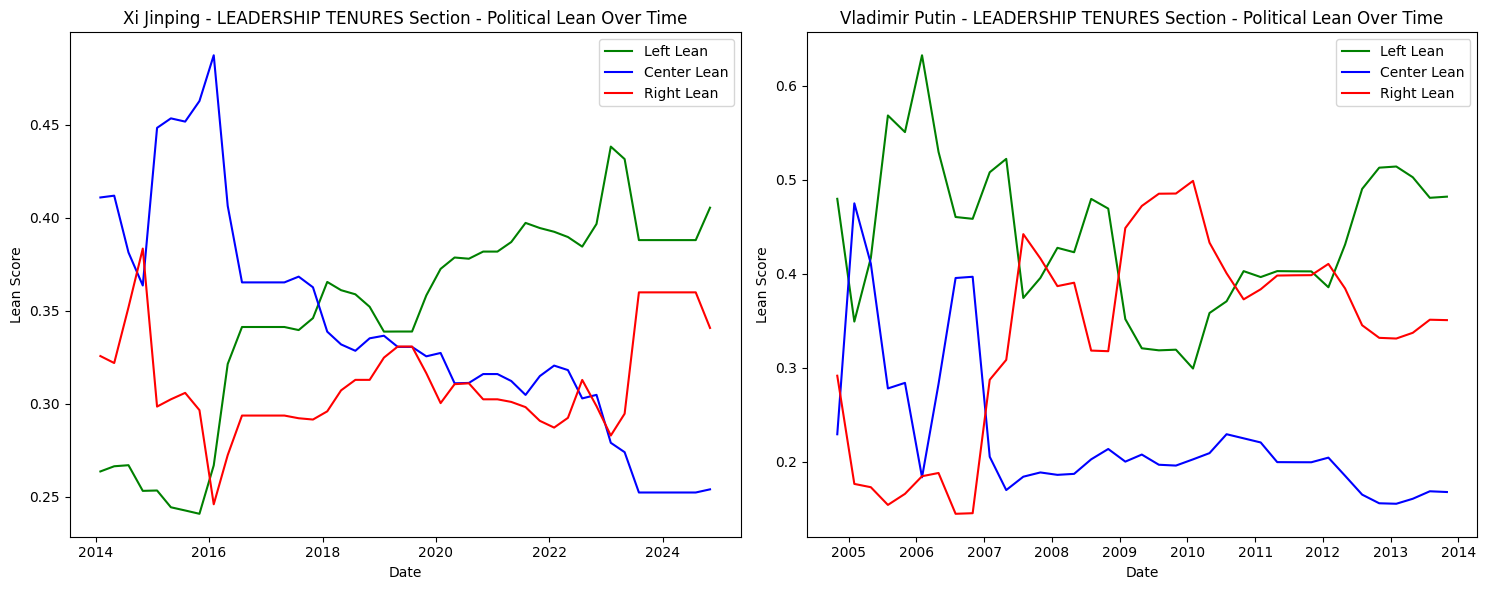

In [81]:
# Create subplots for both Xi Jinping and Vladimir Putin
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Xi Jinping
plt.sca(axes[0])  # Set current axis to the first subplot
plot_article_lean_over_time(nlp_df, article_name='Xi Jinping', category='Leadership Tenures')

# Plot for Vladimir Putin
plt.sca(axes[1])  # Set current axis to the second subplot
plot_article_lean_over_time(nlp_df, article_name='Vladimir Putin', category='Leadership Tenures')

# Show the plots
plt.tight_layout()

plt.savefig(r'Data\Figures\political_lean_LT.svg', format='svg')

plt.show()

## "Policy" Section Political Leaning over Time

C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\1353235076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\1353235076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


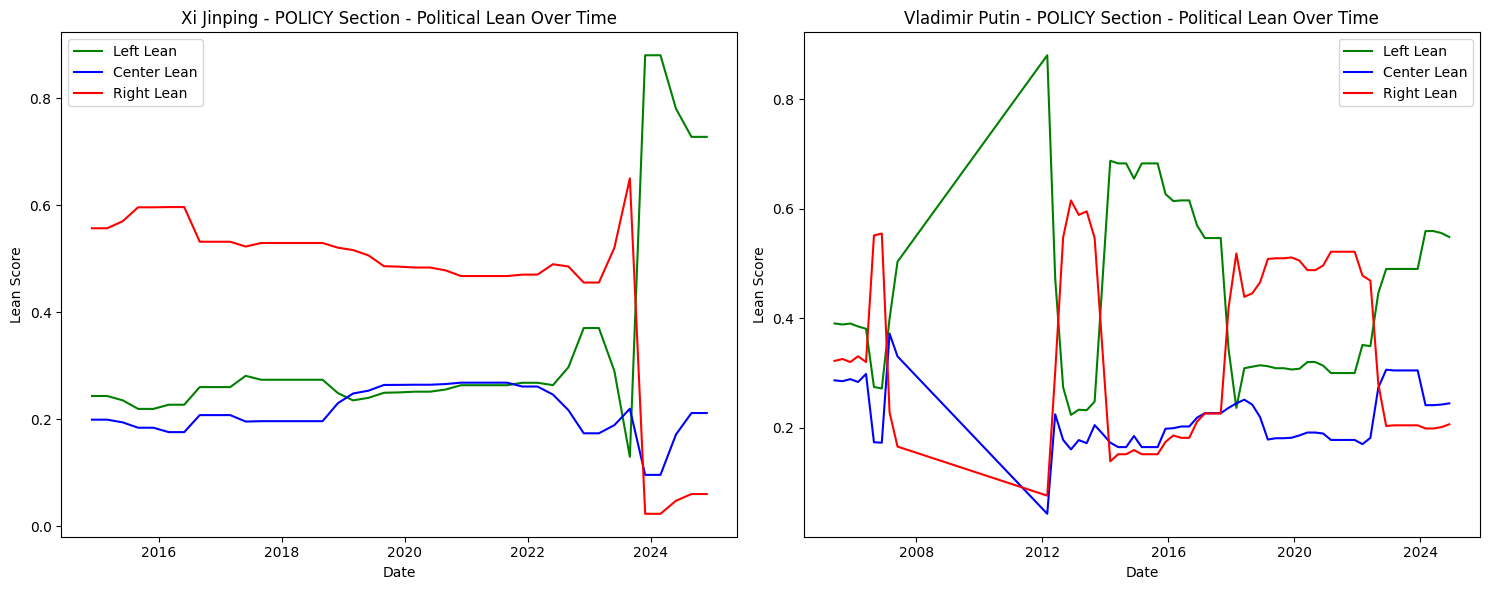

In [82]:
# Create subplots for both Xi Jinping and Vladimir Putin
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Xi Jinping
plt.sca(axes[0])  # Set current axis to the first subplot
plot_article_lean_over_time(nlp_df, article_name='Xi Jinping', category='policy')

# Plot for Vladimir Putin
plt.sca(axes[1])  # Set current axis to the second subplot
plot_article_lean_over_time(nlp_df, article_name='Vladimir Putin', category='policy')

# Show the plots
plt.tight_layout()

plt.savefig(r'Data\Figures\political_lean_policy.svg', format='svg')

plt.show()

## "Origins" Section Political Leaning over Time

C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\1353235076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\1353235076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


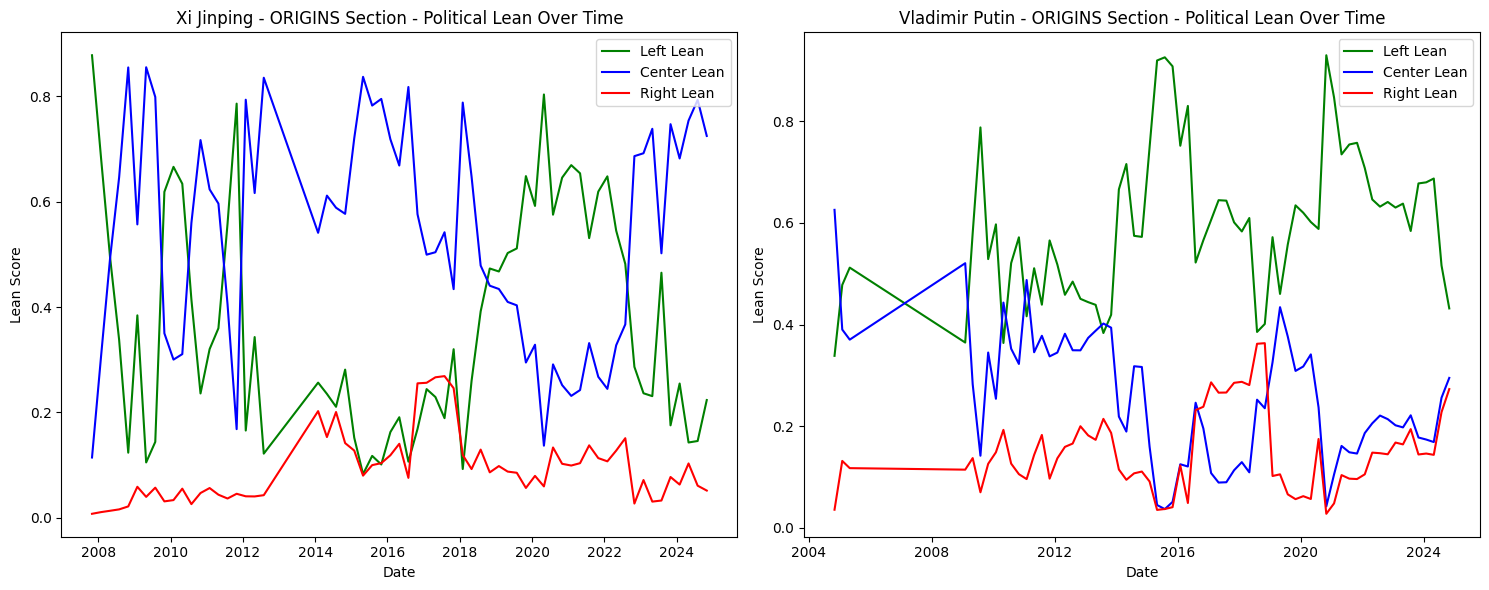

In [83]:
# Create subplots for both Xi Jinping and Vladimir Putin
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Xi Jinping
plt.sca(axes[0])  # Set current axis to the first subplot
plot_article_lean_over_time(nlp_df, article_name='Xi Jinping', category='Origins')

# Plot for Vladimir Putin
plt.sca(axes[1])  # Set current axis to the second subplot
plot_article_lean_over_time(nlp_df, article_name='Vladimir Putin', category='Origins')

# Show the plots
plt.tight_layout()

plt.savefig(r'Data\Figures\political_lean_origins.svg', format='svg')

plt.show()

## Combined Political Lean within Articles over the Years

In [127]:
def categorize_lean(row):
    if row['left_lean'] >= max(row['center_lean'], row['right_lean']):
        return 'Left'
    elif row['right_lean'] >= max(row['left_lean'], row['center_lean']):
        return 'Right'
    else:
        return 'Center'

In [128]:
nlp_df['lean_category'] = nlp_df.apply(categorize_lean, axis=1)

In [130]:
# Grouping by year, month, and category to find mean values
grouped_df = nlp_df.groupby(['year', 'month', 'category']).agg({
    'left_lean': 'mean',
    'center_lean': 'mean',
    'right_lean': 'mean'
}).reset_index()

C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\645275267.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=aggregated_data_putin, x='year', y='count', hue='lean_category',
C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_49448\645275267.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=aggregated_data_xi, x='year', y='count', hue='lean_category',


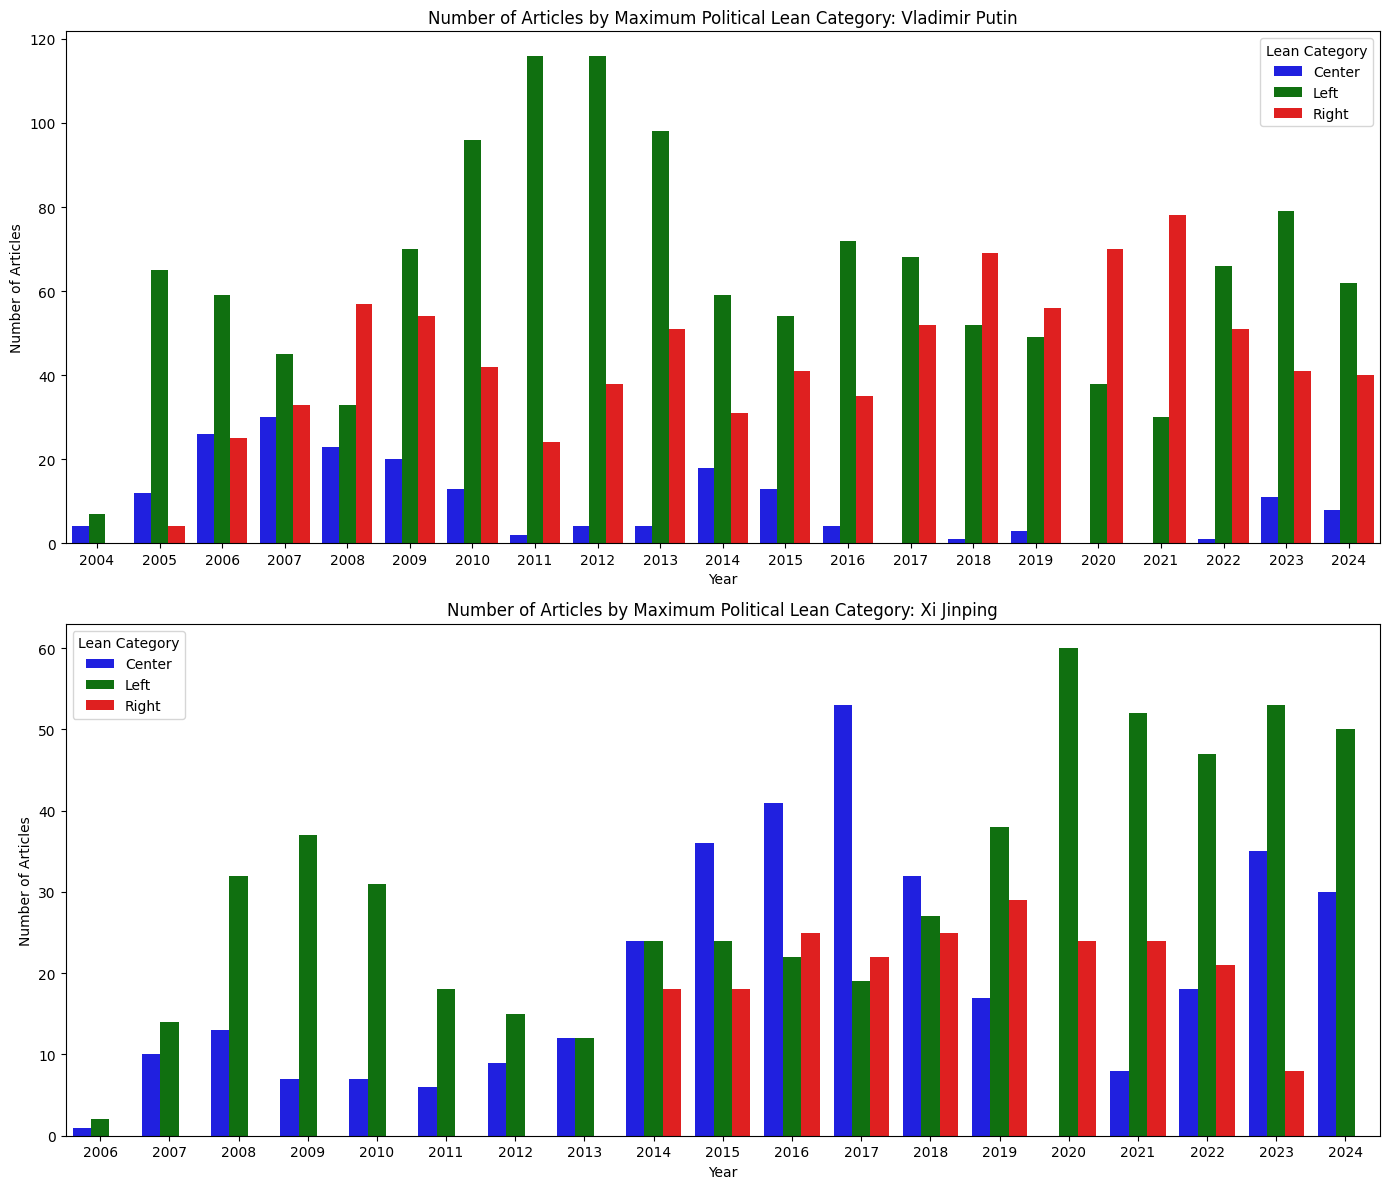

In [142]:
# Filter data for Vladimir Putin
df_putin = nlp_df[nlp_df['article_name'] == 'Vladimir Putin']
# Aggregate data for Putin
aggregated_data_putin = df_putin.groupby(['year', 'lean_category']).size().reset_index(name='count')

# Filter data for Xi Jinping
df_xi = nlp_df[nlp_df['article_name'] == 'Xi Jinping']
# Aggregate data for Xi
aggregated_data_xi = df_xi.groupby(['year', 'lean_category']).size().reset_index(name='count')

# Define color mapping
color_mapping = {
    'Left': 'green',
    'Center': 'blue',
    'Right': 'red'
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot for Vladimir Putin
sns.barplot(data=aggregated_data_putin, x='year', y='count', hue='lean_category',
            palette=color_mapping, ax=axes[0], ci=None)
axes[0].set_title('Number of Articles by Maximum Political Lean Category: Vladimir Putin')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Articles')
axes[0].legend(title='Lean Category')

# Plot for Xi Jinping
sns.barplot(data=aggregated_data_xi, x='year', y='count', hue='lean_category',
            palette=color_mapping, ax=axes[1], ci=None)
axes[1].set_title('Number of Articles by Maximum Political Lean Category: Xi Jinping')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Articles')
axes[1].legend(title='Lean Category')

# Adjust layout
plt.tight_layout()

plt.savefig(r'Data\Figures\political_lean_category_count_total.svg', format='svg')

plt.show()

----------------------------------------------------------------------------------------------------------------------------

# Emotion Analysis

In [40]:
nlp_df.rename(columns={
    'anger_emotion': 'Anger',
    'anticipation_emotion': 'Anticipation',
    'disgust_emotion': 'Disgust',
    'fear_emotion': 'Fear',
    'joy_emotion': 'Joy',
    'negative_emotion': 'Negative',
    'positive_emotion': 'Positive',
    'sadness_emotion': 'Sadness',
    'surprise_emotion': 'Surprise',
    'trust_emotion': 'Trust'
}, inplace=True)

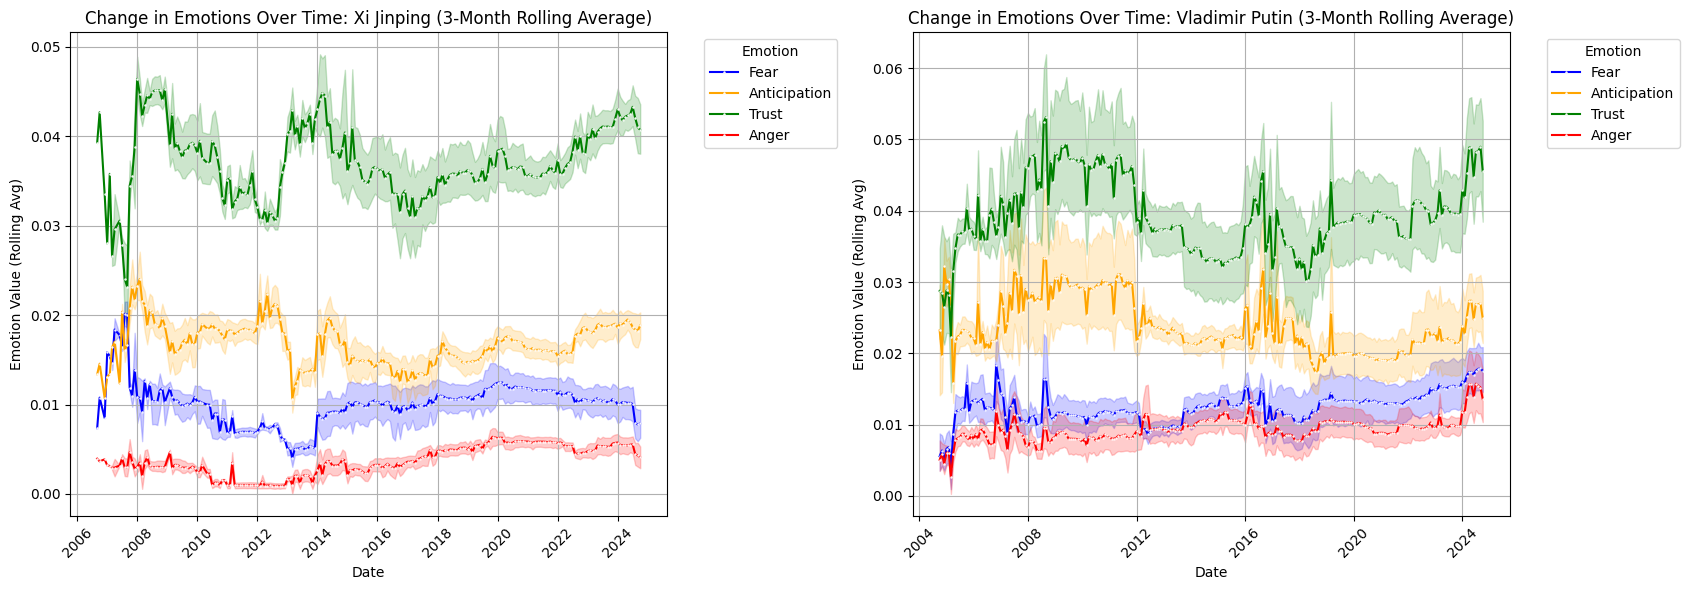

In [42]:
# Filter data for Xi and Putin
xi_df = nlp_df[nlp_df['article_name'] == 'Xi Jinping']
putin_df = nlp_df[nlp_df['article_name'] == 'Vladimir Putin']

# Create a single figure for subplots
plt.figure(figsize=(17, 6))

# Array of dataframes
df_arr = [xi_df, putin_df]
titles = ['Xi Jinping', 'Vladimir Putin']



# Loop through each DataFrame to create subplots
for plot in range(2):
    plt.subplot(1, 2, plot + 1)

    # Melt the DataFrame for easier plotting
    df_melted = df_arr[plot].melt(id_vars=['date', 'category'], 
                                   value_vars=['Fear', 'Anticipation', 'Trust', 'Anger'],
                                   var_name='emotion', 
                                   value_name='value')

    # Calculate the rolling average
    df_melted['rolling_avg'] = df_melted.groupby('emotion')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

    # Set up the color palette for the emotions
    emotion_palette = {
        'Fear': 'blue',
        'Anticipation': 'orange',
        'Trust': 'green',
        'Anger': 'red'
    }

    # Create the line plot with rolling averages
    sns.lineplot(data=df_melted, x='date', y='rolling_avg', hue='emotion', palette=emotion_palette, marker='o', markersize=1)

    # Customize the plot
    plt.title(f'Change in Emotions Over Time: {titles[plot]} (3-Month Rolling Average)')
    plt.xlabel('Date')
    plt.ylabel('Emotion Value (Rolling Avg)')
    plt.xticks(rotation=45)
    plt.grid()

    # Position the legend outside the plot
    plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig(r'Data\Figures\emotion_over_time_split.svg', format='svg')

# Show the plot 
plt.show()

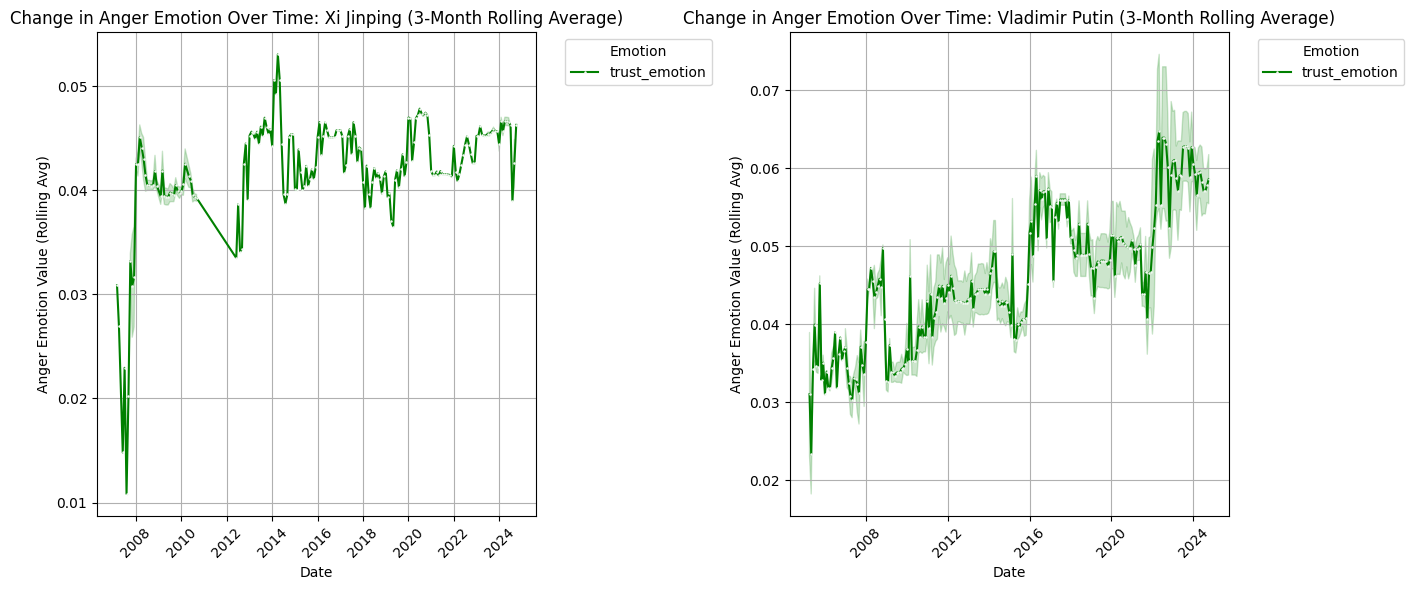

In [207]:
# Filter data for Xi and Putin
xi_df = nlp_df[(nlp_df['article_name'] == 'Xi Jinping') & (nlp_df['category'] == 'Carreer Progression')]
putin_df = nlp_df[(nlp_df['article_name'] == 'Vladimir Putin') & (nlp_df['category'] == 'Carreer Progression')]

# Create a single figure for subplots
plt.figure(figsize=(14, 6))

# Array of dataframes
df_arr = [xi_df, putin_df]
titles = ['Xi Jinping', 'Vladimir Putin']

# Loop through each DataFrame to create subplots
for plot in range(2):
    plt.subplot(1, 2, plot + 1)

    # Melt the DataFrame for easier plotting
    df_melted = df_arr[plot].melt(id_vars=['date', 'category'], 
                                   value_vars=['Trust'],  # Focus on anger emotion only
                                   var_name='emotion', 
                                   value_name='value')

    # Calculate the rolling average
    df_melted['rolling_avg'] = df_melted['value'].rolling(window=3, min_periods=1).mean()

    # Set up the color palette for the emotions
    emotion_palette = {
        'Trust': 'green'
    }

    # Create the line plot with rolling averages
    sns.lineplot(data=df_melted, x='date', y='rolling_avg', hue='emotion', palette=emotion_palette, marker='o', markersize=1)

    # Customize the plot
    plt.title(f'Change in Trust Emotion Over Time: {titles[plot]} (3-Month Rolling Average)')
    plt.xlabel('Date')
    plt.ylabel('Anger Emotion Value (Rolling Avg)')
    plt.xticks(rotation=45)
    plt.grid()

    # Position the legend outside the plot
    plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig(r'Data\Figures\trust_emotionn_shift_career_progression.svg', format='svg')

# Show the plot 
plt.show()